In [ ]:
L_array = [20,28,32,40,60]

5-element Vector{Int64}:
 20
 28
 32
 40
 60

In [ ]:


percentage_of_non_zero_sites_in_PTB=[
20,
17.3913043478261,
16.1904761904762,
16.5680473372781,
14.6276595744681]

5-element Vector{Float64}:
 20.0
 17.3913043478261
 16.1904761904762
 16.5680473372781
 14.6276595744681

In [69]:
using Plots

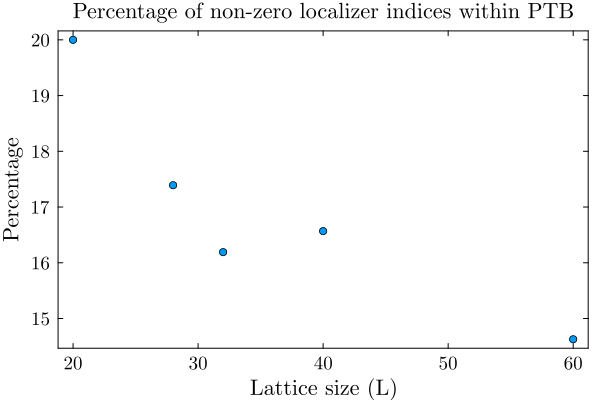

In [71]:
p2=scatter(L_array, percentage_of_non_zero_sites_in_PTB, label=:none, xlabel="Lattice size (L)", ylabel="Percentage", title="Percentage of non-zero localizer indices within PTB", legend=:none)

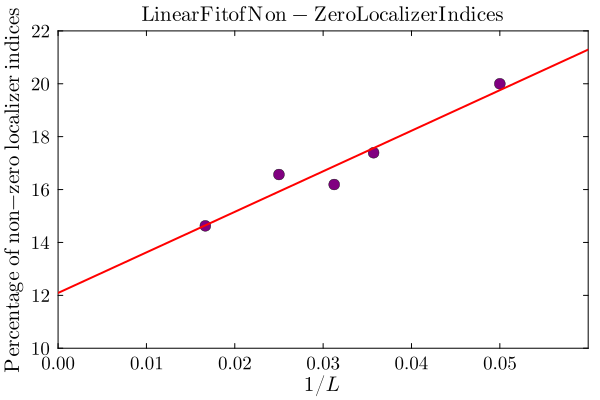

In [92]:
using LsqFit
using LaTeXStrings

# Define the linear model: y = a*x + b
linear_model(x, p) = p[1] .* x .+ p[2]

xdata = 1 ./ L_array
ydata = percentage_of_non_zero_sites_in_PTB

# Initial guess for parameters [a, b]
p0 = [1.0, 0.0]

fit = curve_fit(linear_model, xdata, ydata, p0)

x_fit = range(0, 0.06, length=100)
y_fit = linear_model(x_fit, fit.param)

default(fontfamily="Computer Modern", framestyle=:box, legendfontsize=10, guidefontsize=14, tickfontsize=12, grid=false)

p3 = scatter(
    xdata, ydata,
    label="Data points",
    xlabel=L"1/L",
    ylabel=L"\mathrm{Percentage\ of\ non{-}zero\ localizer\ indices}",
    title=L"\mathrm{Linear Fit of Non-Zero Localizer Indices}",
    legend=:none,
    xlims=(0, 0.06),
    ylims=(10, 22),
    markersize=6,
    markerstrokewidth=0.5,
    color=:purple
)
plot!(
    x_fit, y_fit,
    label="Linear fit (LsqFit)",
    color=:red,
    linewidth=2
)


In [ ]:
## Convert to nearest integer
N_array = percentage_of_sites_in_PTB .* L_array.^2
N_array = round.(Int, N_array)

5-element Vector{Int64}:
  45
  92
 105
 169
 376

In [88]:
1.0 ./N_array

5-element Vector{Float64}:
 0.022222222222222223
 0.010869565217391304
 0.009523809523809525
 0.005917159763313609
 0.0026595744680851063

In [ ]:
savefig(p3, "localizer_percentage_fit_rational.pdf")

"/work/submit/archi137/Documents/GitHub/lattices-julia/data/HOTI/localizer_index/localizer_percentage_fit_rational.pdf"